# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [162]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [163]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")






Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | shaowu
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | berezovo
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | ghanzi
Processing Record 11 of Set 1 | yamethin
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | weno
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | mogadishu
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | adamstown
Processing Record 23 of Set 1 | talna

In [164]:
print(city_data)

[{'City': 'chonchi', 'Lat': -42.6128, 'Lng': -73.8092, 'Max Temp': 17.29, 'Humidity': 81, 'Cloudiness': 98, 'Wind Speed': 2.61, 'Country': 'CL', 'Date': 1735258153}, {'City': 'college', 'Lat': 64.8569, 'Lng': -147.8028, 'Max Temp': -15.85, 'Humidity': 70, 'Cloudiness': 100, 'Wind Speed': 0, 'Country': 'US', 'Date': 1735258154}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 5.17, 'Humidity': 81, 'Cloudiness': 70, 'Wind Speed': 15.62, 'Country': 'TF', 'Date': 1735258155}, {'City': 'nagqu', 'Lat': 31.5, 'Lng': 92, 'Max Temp': -14.76, 'Humidity': 34, 'Cloudiness': 0, 'Wind Speed': 0.9, 'Country': 'CN', 'Date': 1735258156}, {'City': 'shaowu', 'Lat': 27.3409, 'Lng': 117.4831, 'Max Temp': 10.36, 'Humidity': 71, 'Cloudiness': 100, 'Wind Speed': 1.12, 'Country': 'CN', 'Date': 1735258158}, {'City': 'san antonio de pale', 'Lat': -1.4014, 'Lng': 5.6325, 'Max Temp': 26.29, 'Humidity': 80, 'Cloudiness': 65, 'Wind Speed': 1.04, 'Country': 'GQ', 'Date': 1735258159}, {'City':

In [165]:
# Convert the cities weather data into a Pandas DataFrame



city_data_df = pd.DataFrame(city_data)

# Show Record Count


In [166]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,17.29,81,98,2.61,CL,1735258153
1,college,64.8569,-147.8028,-15.85,70,100,0.00,US,1735258154
2,port-aux-francais,-49.3500,70.2167,5.17,81,70,15.62,TF,1735258155
3,nagqu,31.5000,92.0000,-14.76,34,0,0.90,CN,1735258156
4,shaowu,27.3409,117.4831,10.36,71,100,1.12,CN,1735258158


In [167]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [168]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,17.29,81,98,2.61,CL,1735258153
1,college,64.8569,-147.8028,-15.85,70,100,0.00,US,1735258154
2,port-aux-francais,-49.3500,70.2167,5.17,81,70,15.62,TF,1735258155
3,nagqu,31.5000,92.0000,-14.76,34,0,0.90,CN,1735258156
4,shaowu,27.3409,117.4831,10.36,71,100,1.12,CN,1735258158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

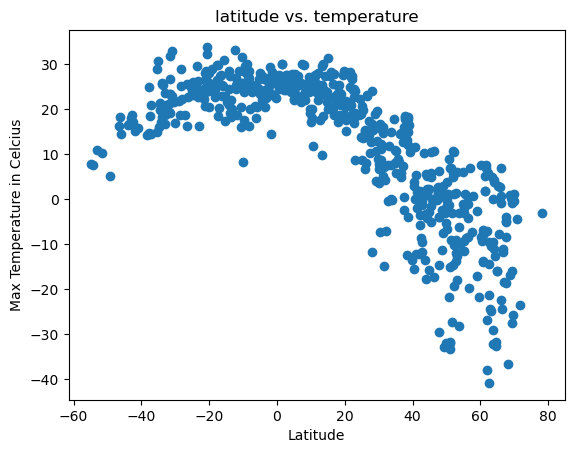

In [169]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("latitude vs. temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

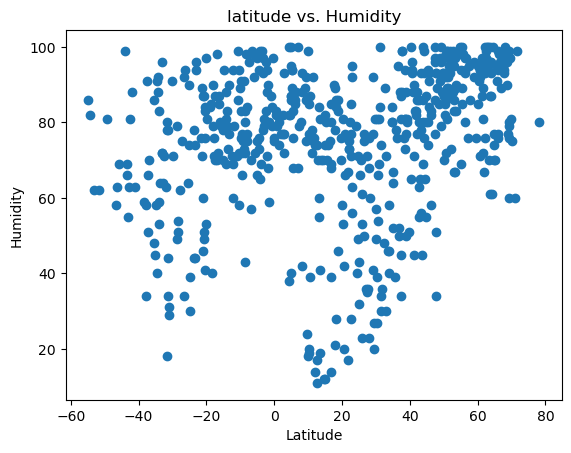

In [170]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

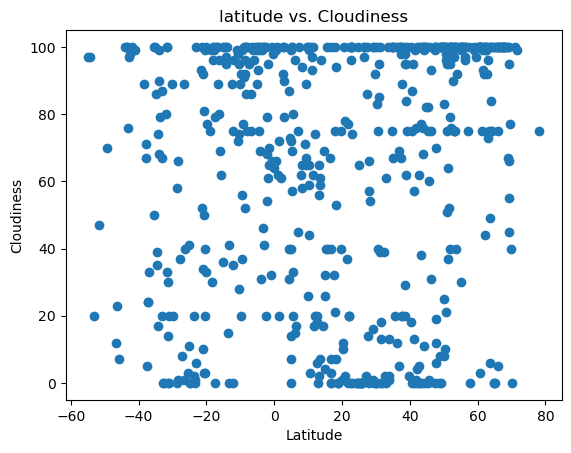

In [171]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

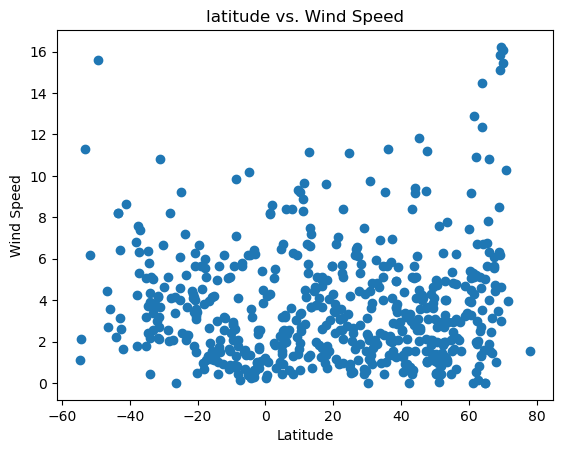

In [172]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]

plt.scatter(latitude, wind)
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [173]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]

y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [174]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-15.85,70,100,0.00,US,1735258154
3,nagqu,31.5000,92.0000,-14.76,34,0,0.90,CN,1735258156
4,shaowu,27.3409,117.4831,10.36,71,100,1.12,CN,1735258158
6,aykhal,66.0000,111.5000,-22.37,99,100,1.87,RU,1735258160
7,berezovo,63.9381,65.0419,-11.08,96,84,3.53,RU,1735258161


In [175]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,17.29,81,98,2.61,CL,1735258153
2,port-aux-francais,-49.3500,70.2167,5.17,81,70,15.62,TF,1735258155
5,san antonio de pale,-1.4014,5.6325,26.29,80,65,1.04,GQ,1735258159
9,ghanzi,-21.5667,21.7833,22.40,76,93,4.43,BW,1735258163
17,waitangi,-43.9535,-176.5597,16.57,99,100,2.24,NZ,1735258173


###  Temperature vs. Latitude Linear Regression Plot

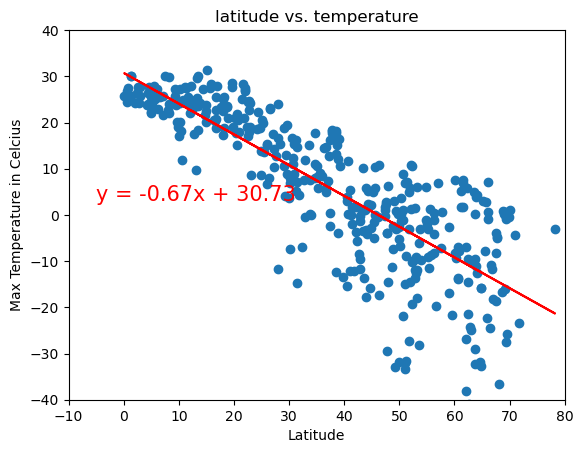

In [190]:
# Linear regression on Northern Hemisphere

latitude = northern_hemi_df["Lat"]
temperature = northern_hemi_df["Max Temp"]
plt.scatter(latitude, temperature) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("latitude vs. temperature")
plt.xlim(-10, 80)
plt.ylim(-40, 40)

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq, (-5,3),fontsize=15,color="red")

plt.show()

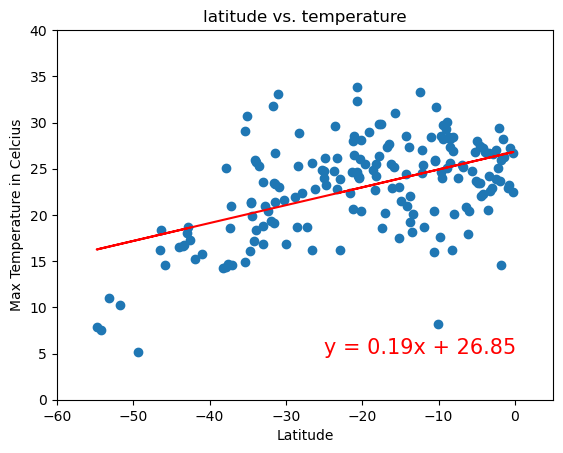

In [189]:
# Linear regression on Southern Hemisphere
latitude = southern_hemi_df["Lat"]

temperature = southern_hemi_df["Max Temp"]
plt.scatter(latitude, temperature) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celcius")
plt.title("latitude vs. temperature")
plt.xlim(-60, 5)
plt.ylim(0, 40)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq, (-25,5),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

The data points in each hemishpere dataset show the relationship between temperature and latitude (with the northern hemishpere shoing a downward trend and the southern hemishpere showing an upward trend). This shows that as latitude in the northern hemishpere increases, temperature decreases, while in the southern hemishpere, increase in latitude shows an increase in temperature.  

### Humidity vs. Latitude Linear Regression Plot

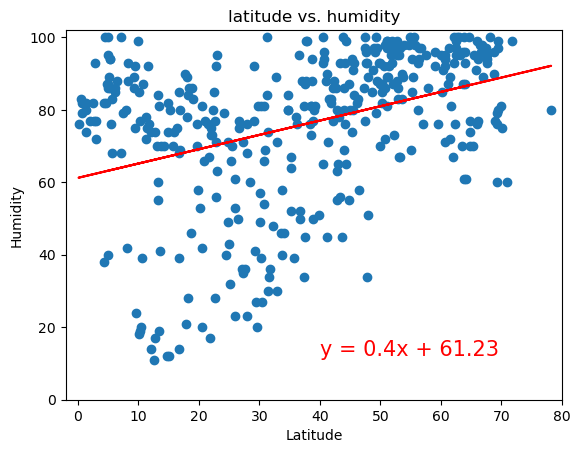

In [188]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
plt.scatter(latitude, humidity) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("latitude vs. humidity")
# plt.xticks(-10, 80, 10)
plt.xlim(-2, 80)
plt.ylim(0, 102)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

plt.show()

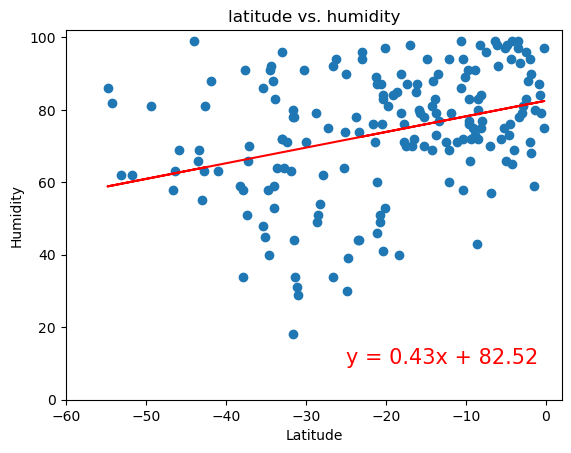

In [187]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]

humidity = southern_hemi_df["Humidity"]
plt.scatter(latitude, humidity) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("latitude vs. humidity")
plt.xlim(-60, 2)
plt.ylim(0, 102)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq, (-25,10),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The trends in the northern and southern hemishpere seem to be very similar, showing that for both hemishperes, an increase in latitude shows and increase in humidity. It seems there are more instances of humidity in the northern hemishpere, and this could be due to more cities being in the notrthern hemishpere or could the the sign of humidity differences based on hemishpere. 

### Cloudiness vs. Latitude Linear Regression Plot

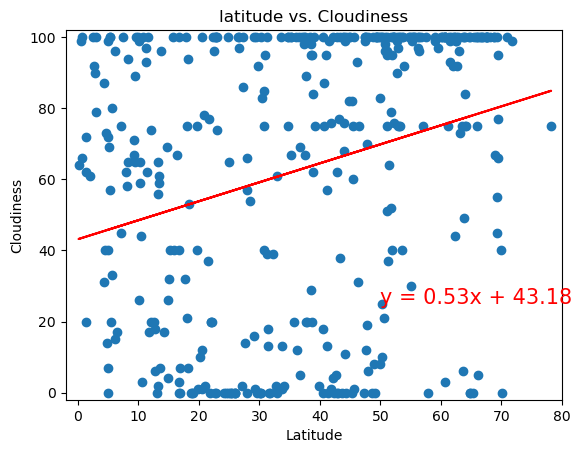

In [186]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
cloudy = northern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudy) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("latitude vs. Cloudiness")
plt.xlim(-2, 80)
plt.ylim(-2, 102)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudy)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

plt.show()

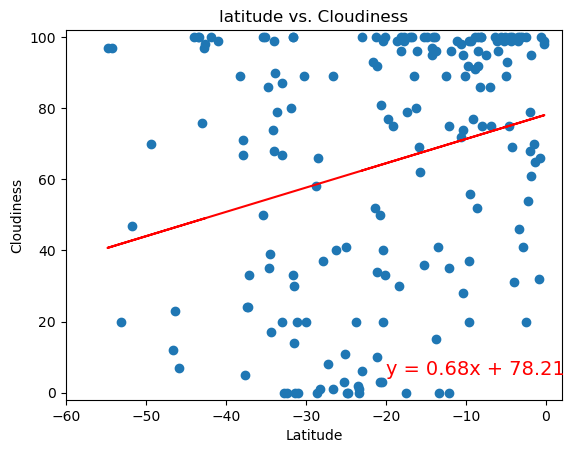

In [185]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]

cloudy = southern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudy) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("latitude vs. Cloudiness")
plt.xlim(-60, 2)
plt.ylim(-2, 102)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudy)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq, (-20,5),fontsize=14,color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE 
The plots show similar trends in cloudiness with changing latitudes, however it seems there are more data points the northern hemisphere, suggesting while the southern and northern hemishperes have similar trends in cloudiness, the morthern hemispere has more instances of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

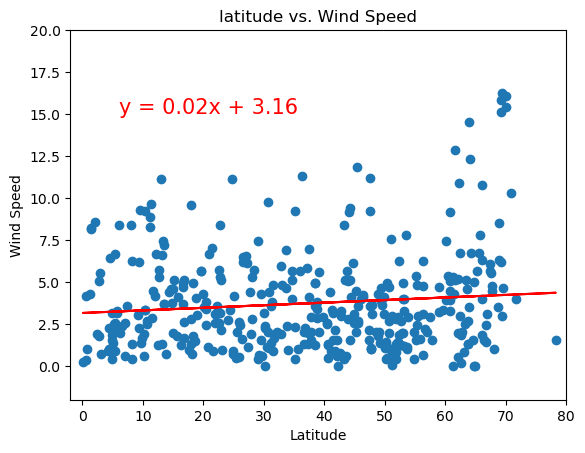

In [184]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
speed = northern_hemi_df["Wind Speed"]
plt.scatter(latitude, speed) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("latitude vs. Wind Speed")
plt.xlim(-2, 80)
plt.ylim(-2, 20)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")

plt.show()

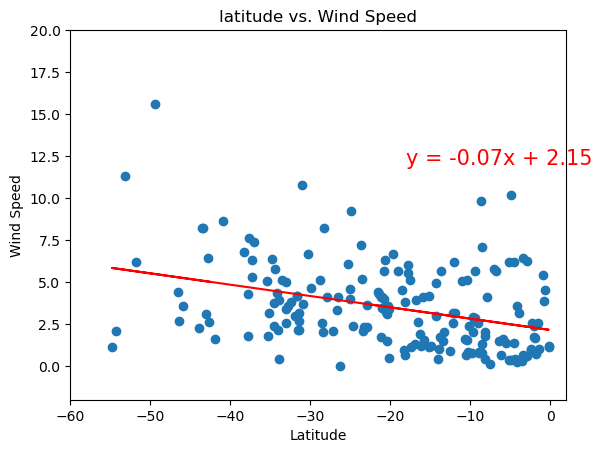

In [183]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]
speed = southern_hemi_df["Wind Speed"]
plt.scatter(latitude, speed) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("latitude vs. Wind Speed")
plt.xlim(-60, 2)
plt.ylim(-2, 20)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-18,12),fontsize=15,color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The trends of wind speed in both hemispheres are relatively flat. However, the trend for the northern hemishpere shows a slight increase, and the southern hemishpere shows a slight decline, as latitude increases. 